# Step 1: Import the necessary libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 2: Load the dataset

In [4]:
# Load the dataset
data = pd.read_csv('./synthetic_heart_failure_data_with_conditions_v3.csv')
#Desktop/Heart_Failure_Prediction/heart-failure-predictor/data/NEW_DATASET/heart.csv
# Desktop/Heart_Failure_Prediction/heart-failure-predictor/synthetic_heart_failure_data_with_conditions_v3.csv

# Display the first few rows
print(data.head())


   Age  Gender  Weight  Height  Chest Pain Type  Heart Rate  \
0   68       0      73     170                3         107   
1   81       0      74     173                2          98   
2   58       0      84     178                0          90   
3   44       0      51     142                1          69   
4   72       1      71     147                0          89   

   Systolic Blood Pressure  Diastolic Blood Pressure  Smoking  \
0                      124                        51        0   
1                      112                        79        0   
2                      120                       101        0   
3                      140                        58        1   
4                      109                        71        0   

   Number of Cygrets Per Day  Diabetes  Anaemia  Any Past Heart Failures  \
0                          0         0        1                        1   
1                          0         0        1                        1   
2 

# Step 3: Preprocess the data

In [5]:
# Check for missing values
print(data.isnull().sum())

# Separate features and target variable
X = data.drop(columns=['Heart Failure'])  # Replace 'target' with the actual column name representing the outcome
y = data['Heart Failure']  # Replace 'target' with the actual column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Age                          0
Gender                       0
Weight                       0
Height                       0
Chest Pain Type              0
Heart Rate                   0
Systolic Blood Pressure      0
Diastolic Blood Pressure     0
Smoking                      0
Number of Cygrets Per Day    0
Diabetes                     0
Anaemia                      0
Any Past Heart Failures      0
SpO2 Level                   0
BPM                          0
Heart Failure                0
dtype: int64


# Step 4: Train the Random Forest model

In [6]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Step 5: Make predictions and evaluate the model

In [7]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00        74

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[226   0]
 [  0  74]]


# Step 6: Interpret the results

In [8]:
# Feature importance
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)


                      Feature  Importance
12    Any Past Heart Failures    0.361712
5                  Heart Rate    0.265873
4             Chest Pain Type    0.153615
2                      Weight    0.030371
7    Diastolic Blood Pressure    0.030214
13                 SpO2 Level    0.030101
6     Systolic Blood Pressure    0.028553
3                      Height    0.027620
0                         Age    0.025531
9   Number of Cygrets Per Day    0.017394
14                        BPM    0.008726
11                    Anaemia    0.006734
10                   Diabetes    0.005475
1                      Gender    0.004108
8                     Smoking    0.003973


# Predict with single entry

In [9]:
# Step 4: Predict a single entry
import numpy as np

single_entry = np.array([[82,0,54,149,2,61,137,96,1,21,1,1,1,73,1]])  # Example entry row 141
# single_entry = np.array([[45,1,79,144,3,127,145,97,1,39,1,1,1,71,2]])  # Example entry row 155

single_prediction = rf_model.predict(single_entry)
single_prediction_proba = rf_model.predict_proba(single_entry)

print(f"Predicted class: {single_prediction[0]}")
print(f"Prediction probabilities: {single_prediction_proba[0]}")

Predicted class: 0
Prediction probabilities: [0.94 0.06]


/home/kalyan/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/kalyan/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Save the trained model

In [10]:
import pickle
model_filename = 'random_forest_model_v3.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f'Model saved to {model_filename}')

Model saved to random_forest_model_v3.pkl


In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validated accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Cross-validated accuracy: 1.00 ± 0.00


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[226   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00        74

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



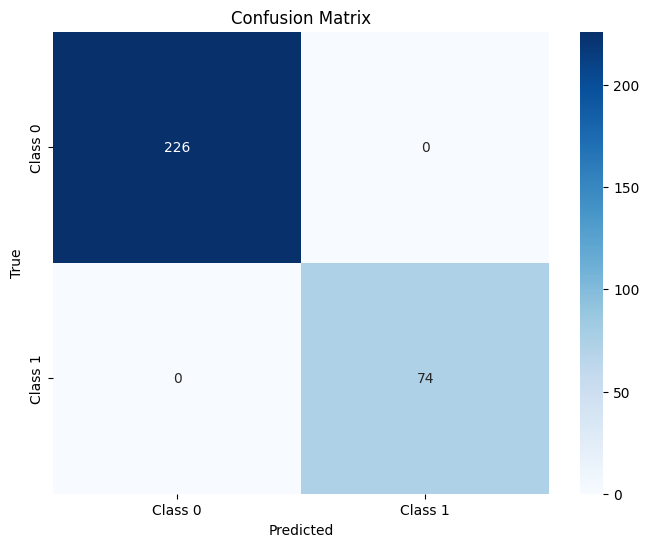

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


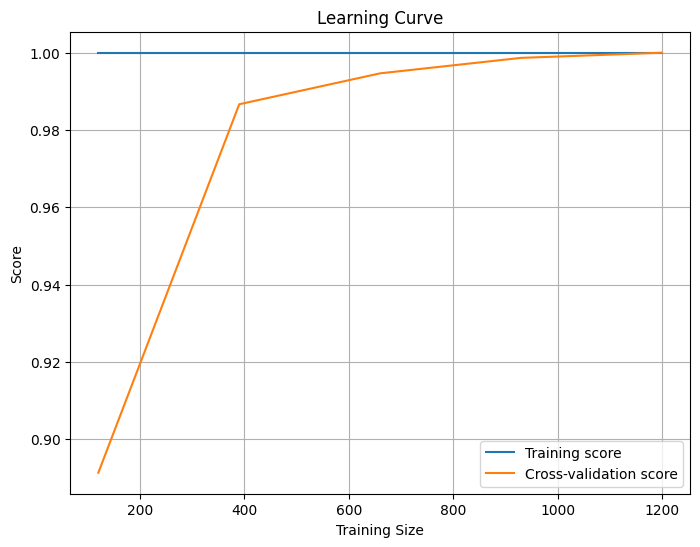

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5)

# Calculate mean and std
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


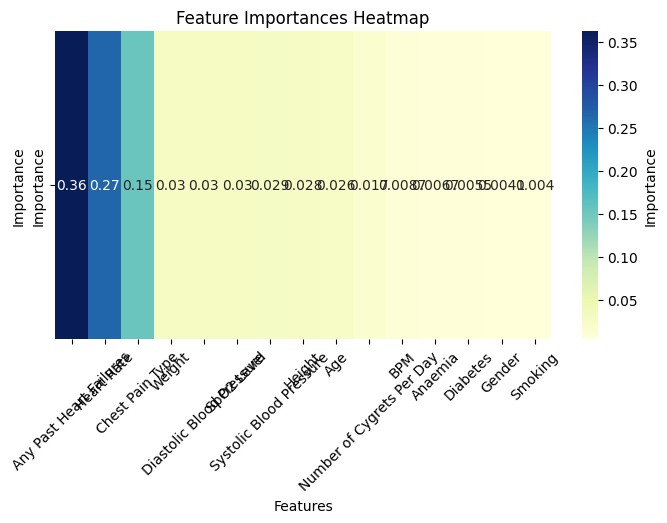

In [16]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["Importance"]).sort_values("Importance", ascending=False)


plt.figure(figsize=(8, 4))
sns.heatmap(feature_importances.T, cmap="YlGnBu", annot=True, cbar_kws={"label": "Importance"})
plt.title('Feature Importances Heatmap')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()